Ben Christensen

In [1]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Problem 1

The odeint solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [8]:
def predator_prey(y, t):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    return (y[0]*(1 - 0.5*y[1]), y[1]*(-.75 + .25*y[0]))

# Problem 2

Use odeint to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of odeint) on the same plot.

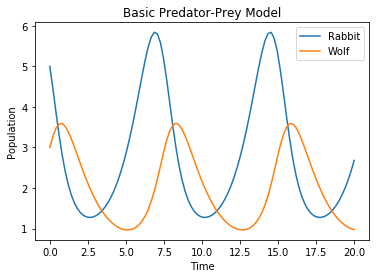

In [11]:
time = np.linspace(0,20,100)
#Solve the ODE with the solver
sol = odeint(predator_prey, [5,3], time)
#Plot and prettify the plot
plt.plot(time, sol[:,0], label="Rabbit")
plt.plot(time, sol[:,1], label="Wolf")
plt.title("Basic Predator-Prey Model")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()


# Problem 3

Similar to problem 1, define the function Lotka_volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using odeint, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

In [21]:
def Lotka_Volterra(y, t):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing predator and prey populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    return (y[0]*(1 - y[1]), (1/3)*y[1]*(-1 + y[0]))

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

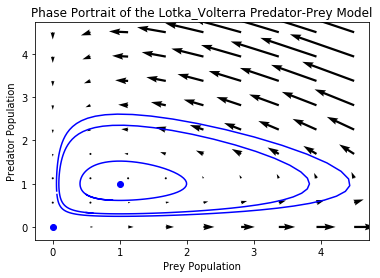

In [22]:
time = np.linspace(0,13,100)
#Solve and plot ODE at the initial conditions
for initial_condition in [[.5,1/3], [.5,.75], [1/16,.75]]:
    sol = odeint(Lotka_Volterra, initial_condition, time)
    plt.plot(sol[:,0], sol[:,1], color='b')
#Plot the fixed points
plt.scatter(0,0, color='b')
plt.scatter(1,1, color='b')
#Prettify the graph
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Phase Portrait of the Lotka_Volterra Predator-Prey Model")
plt.show()
    

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use odeint to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

In [25]:
def Logistic_Model(y, t):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    return (y[0]*(1-y[0]-y[1]), (ada)*y[1]*(y[0] - rho))

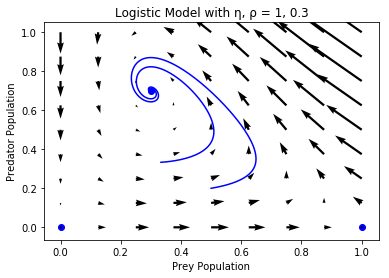

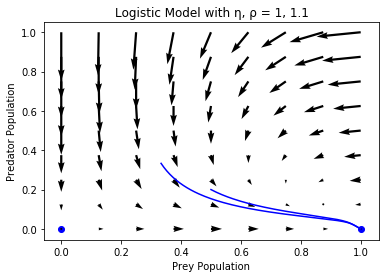

In [41]:
#Graph the several different solutions to the ODE according
#    to the different parameters and initial values
titles = ["Logistic Model with η, ρ = 1, 0.3", "Logistic Model with η, ρ = 1, 1.1"]
time = np.linspace(0,40,1000)
for i, parameter_values in enumerate([(1, 0.3), (1,1.1)]):
    ada, rho = parameter_values
    #Plot the solutions to the ODE for each initial value
    for initial_value in [[1/3,1/3], [.5, 1/5]]:
        sol = odeint(Logistic_Model, initial_value, time)
        plt.plot(sol[:,0], sol[:,1],color='b')
    #Plot the equilibrium points
    plt.scatter(0,0,color='b')
    if i==0:
        plt.scatter(rho, 1-rho, color='b')
    plt.scatter(1,0,color='b')
    #Plot the direction field
    # Provided code for plotting phase portrait.
    Y1, Y2 = np.meshgrid(np.linspace(0,1,25), np.linspace(0,1,25))
    dU, dV = Logistic_Model((Y1, Y2), 0)
    Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
    #Prettify
    plt.title(titles[i])
    plt.xlabel("Prey Population")
    plt.ylabel("Predator Population")
    plt.show()
    
    

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbe’s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [71]:
def forbes(F):
    """Solve for Forbe's equation using the input F(t)
    
    Parameters:
        F (float): weight of fat tissue
        
    Returns:
        p (float): proportion of the energy balance resulting
            in a change in the quantity of lean tissue
    """
    return C/(C+F)

def energy_balance(F,L,PAL,EI):
    """Solve for the energy balance
    
    Parameters:
        F (float): weight of fat tissue
        L (float): weight of lean tissue
        PAL (float): Physical Activity Level
        EI (float): Energy Intake
        
    Returns:
        EB (float): Energy balance
        p (float): solution from forbes
    """
    p = forbes(y[0])
    return ((1/PAL - Beta) * EI - K - gammaF*F - gammaL * L) / ((adaF/rhoF) * (1-p) + (adaL/rhoL)*p + 1/PAL), p

def weight_odesystem(y,t):
    """Prepare the ODE system
    
    Parameters:
        y ((2,) ndarray): A vector representing the fat and lean
            weights at time t
        t (float): Current time
    
    Returns:
        (tuple): A tuple representing the right-hand side 
            of the ODE
    """

    EB, p = energy_balance(y[0],y[1],PAL,EI)
    return ((1-p)*EB / rhoF, p*EB/rhoL)
    

In [72]:
#Establish the many constants
rhoF = 9400
rhoL = 1800
gammaF = 3.2
gammaL = 22
adaF = 180
adaL = 230
Beta = 0.14
C = 10.4*rhoL/rhoF


# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use odeint to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

In [73]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

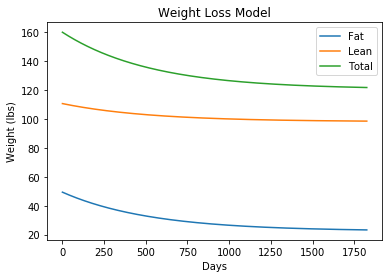

In [74]:
#Her initial state
PAL = 1.4
EI = 2143
F = fat_mass(72.5748, 38, 1.7272, "female")
L = 72.5748 - F
K = (1/PAL - Beta) * EI - gammaF*F - gammaL*L
#After she decides to change her ways:
PAL = 1.5
EI = 2025
#Solve with ODE
y0 = [F, L]
time = np.linspace(0,5*365,5*365)
sol = odeint(weight_odesystem, y0, time)
#Plot and prettify
plt.plot(time, 2.20462*sol[:,0], label="Fat")
plt.plot(time, 2.20462*sol[:,1], label="Lean")
plt.plot(time, 2.20462*(sol[:,0] + sol[:,1]), label="Total")
plt.title("Weight Loss Model")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.legend()
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

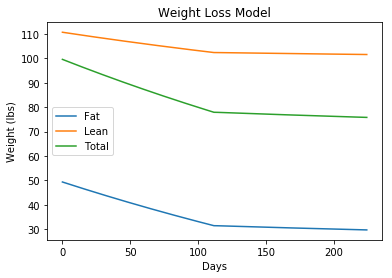

In [79]:
#ROUND ONE
#    Her initial state
PAL = 1.4
EI = 2143
F = fat_mass(72.5748, 38, 1.7272, "female")
L = 72.5748 - F
K = (1/PAL - Beta) * EI - gammaF*F - gammaL*L
#    After she decides to change her ways:
PAL = 1.7
EI = 1600
#    Solve with ODE
y0 = [F, L]
time = np.linspace(0,16*7,16*7)
sol1 = odeint(weight_odesystem, y0, time)
#ROUND TWO
#    Her initial state
F, L = sol1[-1]
#K = (1/PAL - Beta) * EI - gammaF*F - gammaL*L
#    She eases up on the diet and exercise:
PAL = 1.5
EI = 2025
#    Solve
y0 = [F,L]
sol2 = odeint(weight_odesystem, y0, time)

#Plot!
new_time = np.linspace(0, 2*16*7, 2*16*7)
plt.plot(new_time, 2.20462*np.concatenate((sol1[:,0],sol2[:,0])), label="Fat")
plt.plot(new_time, 2.20462*np.concatenate((sol1[:,1],sol2[:,1])), label="Lean")
plt.plot(new_time, 2.20462*np.concatenate((sol1[:,0],sol2[:,0])) + np.concatenate((sol1[:,1],sol2[:,1])), label="Total")
plt.legend()
plt.title("Weight Loss Model")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.show()